# Data Driven approach for Poverty Anlysis and Prediction System

## Importing Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## Load Dataset

In [2]:
train_data = pd.read_csv('train_labels.csv')
test_data = pd.read_csv('test_values.csv')
poverty_data = pd.read_csv('poverty_dataset.csv')

## Exploratory Data Analysis

In [3]:
# Display basic information about the datasets
print("Train dataset information:")
print(train_data.info())

print("\nTest dataset information:")
print(test_data.info())

print("\nPoverty dataset information:")
print(poverty_data.info())

# Summary statistics of the poverty dataset
print("\nSummary statistics of the Poverty dataset:")
print(poverty_data.describe())

Train dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row_id               12600 non-null  int64  
 1   poverty_probability  12600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 197.0 KB
None

Test dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   row_id                                 8400 non-null   int64  
 1   country                                8400 non-null   object 
 2   is_urban                               8400 non-null   bool   
 3   age                                    8400 non-null   float64
 4   female                                 8400 non-null   bool  

In [17]:
# Merge the poverty probability from train_data into the poverty_dataset
poverty_data = poverty_data.merge(train_data, on='row_id', how='left')

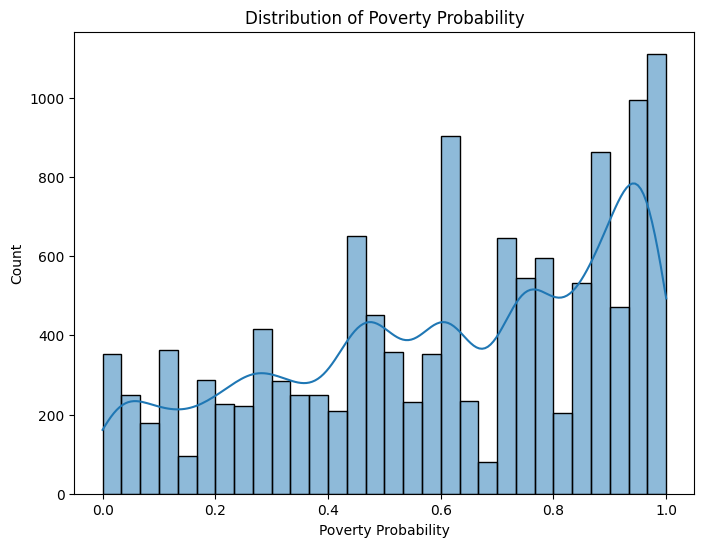

In [4]:
# Distribution of the target variable (poverty_probability) in the train dataset
plt.figure(figsize=(8, 6))
sns.histplot(train_data['poverty_probability'], bins=30, kde=True)
plt.title("Distribution of Poverty Probability")
plt.xlabel("Poverty Probability")
plt.ylabel("Count")
plt.show()

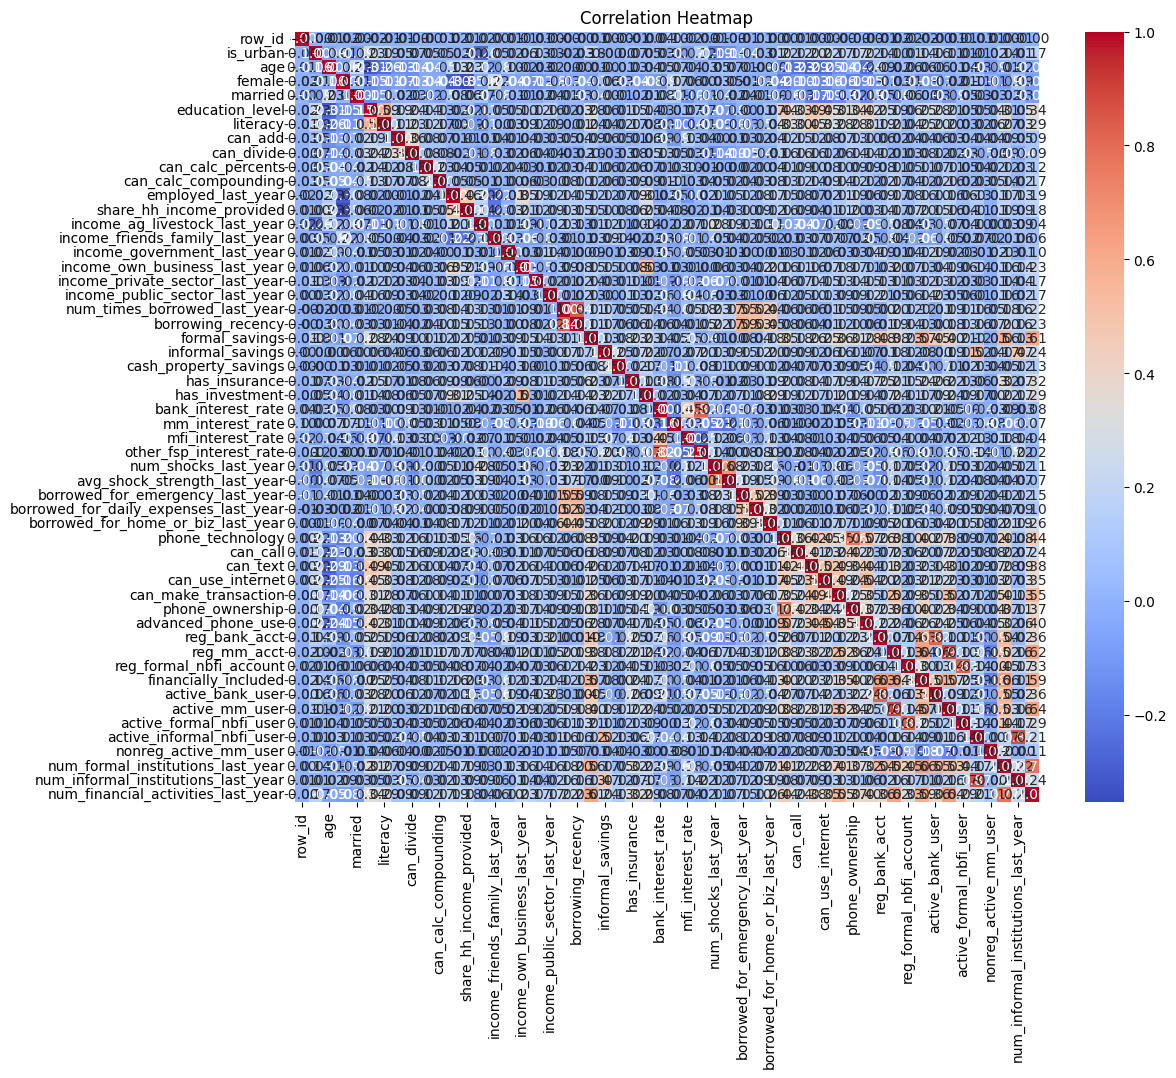

In [5]:
# Correlation heatmap to visualize the relationships between numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(poverty_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

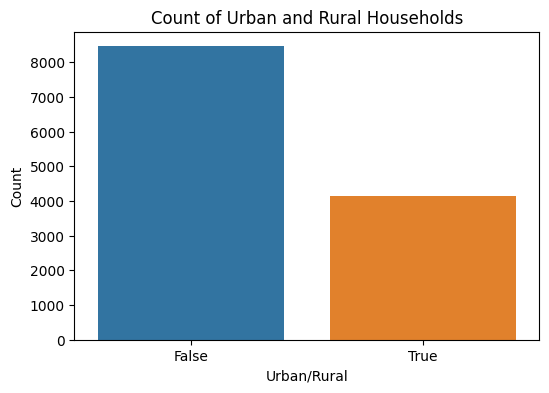

In [6]:
# Bar plot to visualize the count of urban and rural households in the poverty dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='is_urban', data=poverty_data)
plt.title("Count of Urban and Rural Households")
plt.xlabel("Urban/Rural")
plt.ylabel("Count")
plt.show()

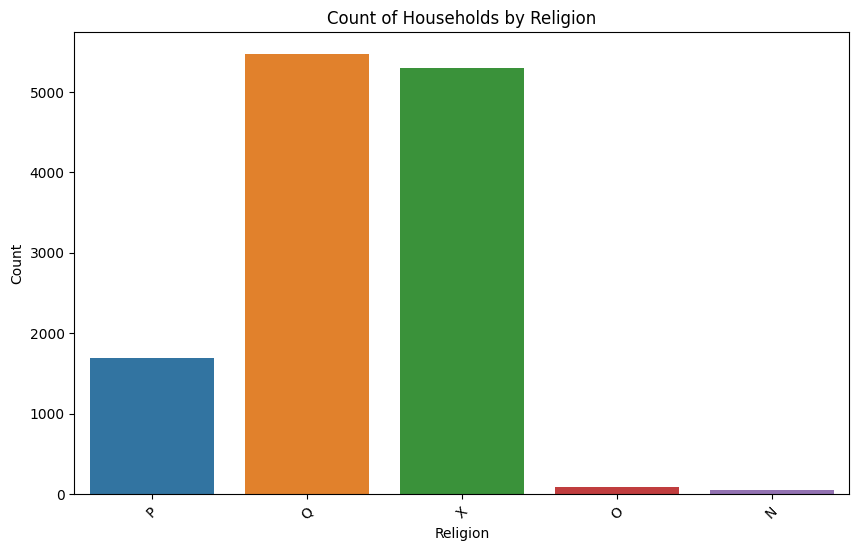

In [7]:
# Bar plot to visualize the count of households by religion in the poverty dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='religion', data=poverty_data)
plt.title("Count of Households by Religion")
plt.xlabel("Religion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

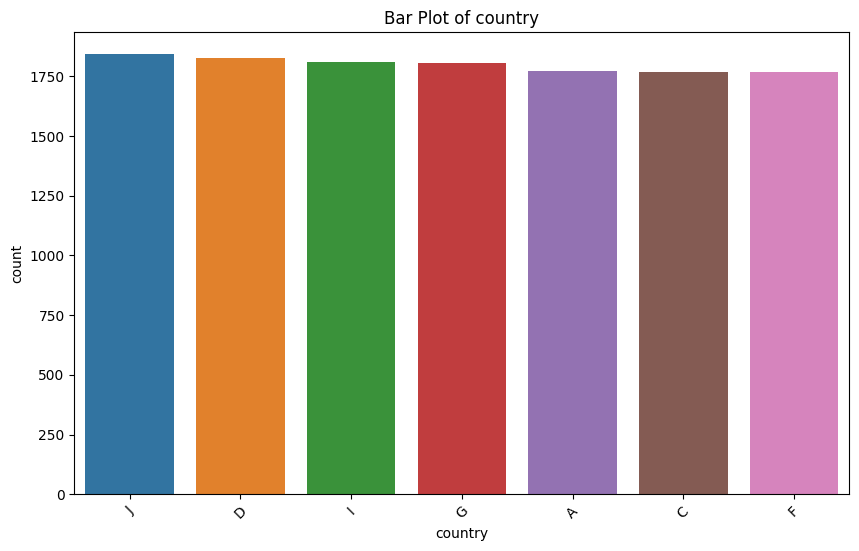

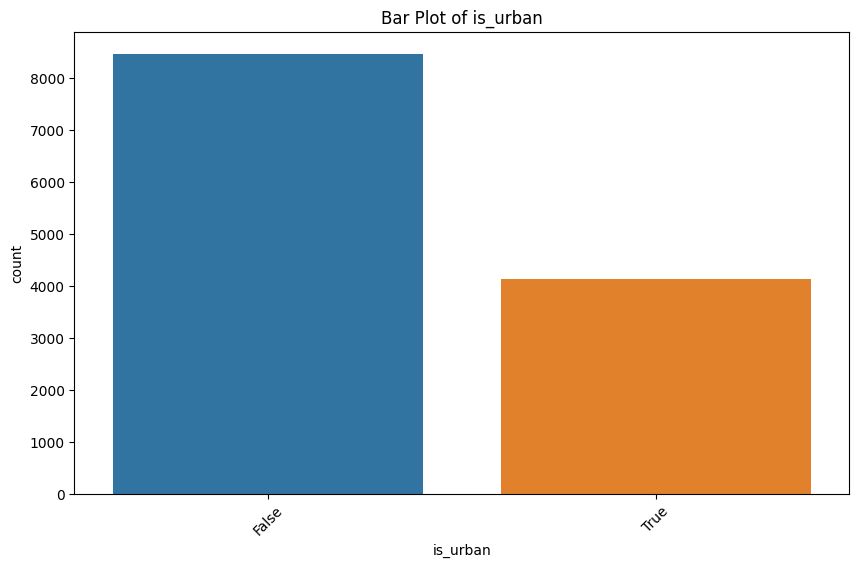

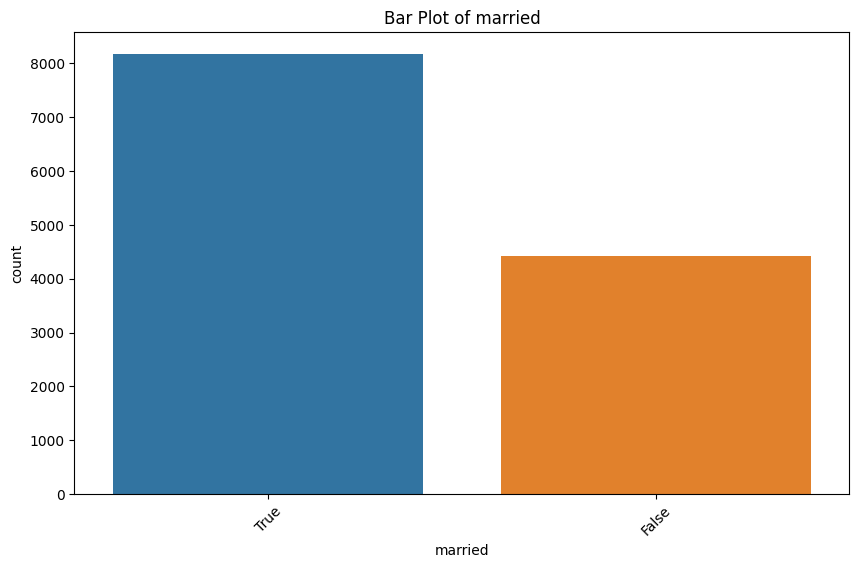

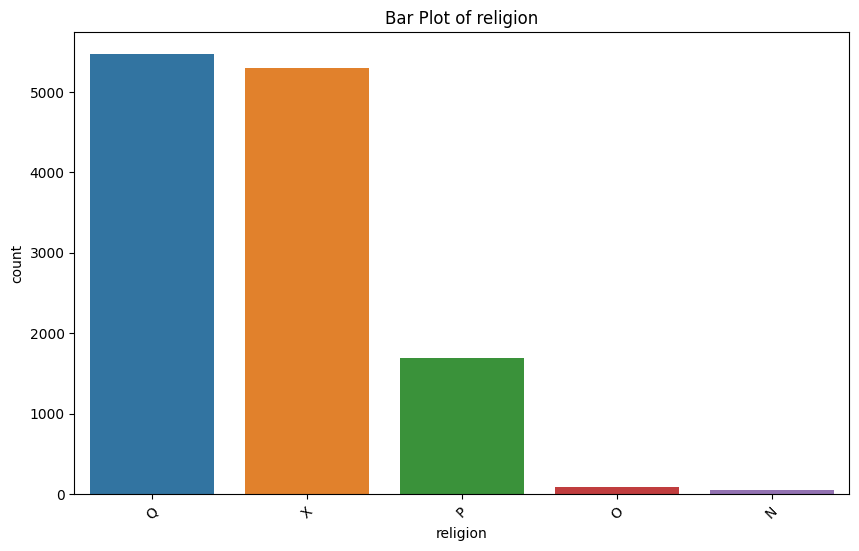

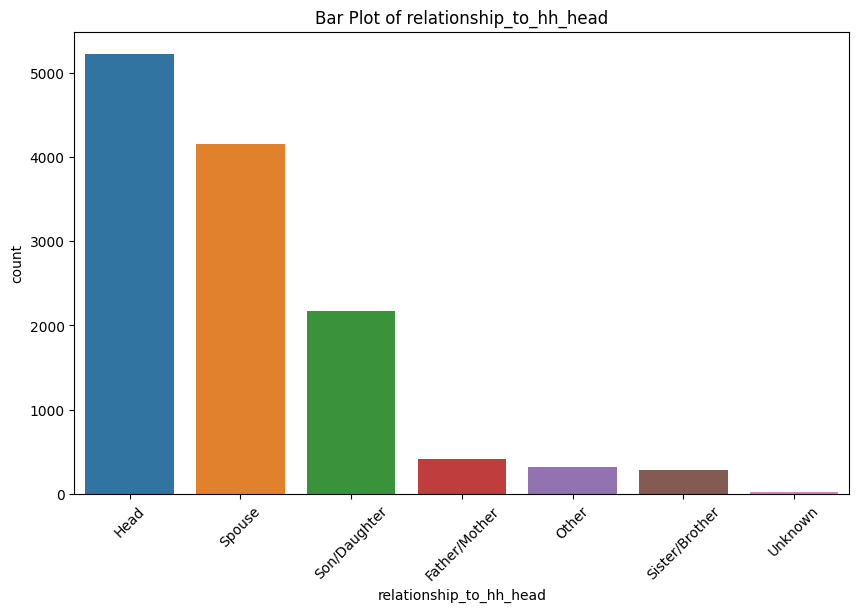

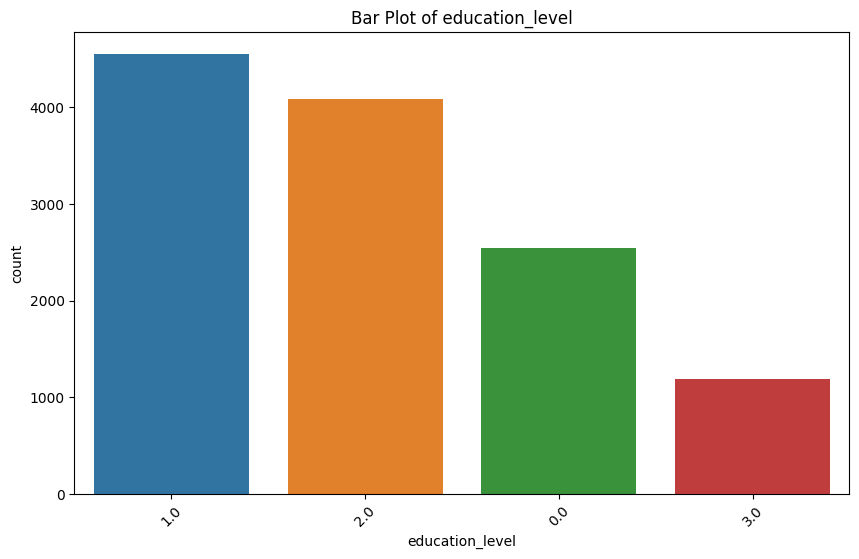

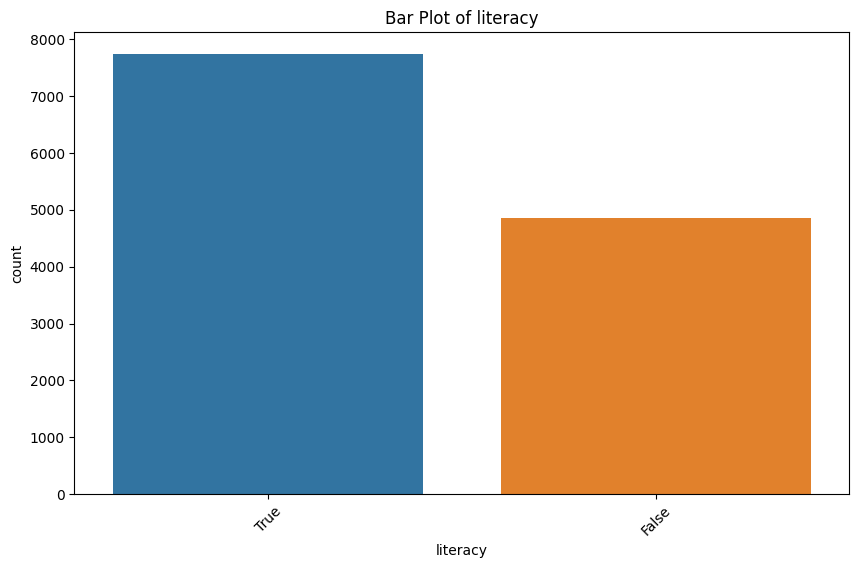

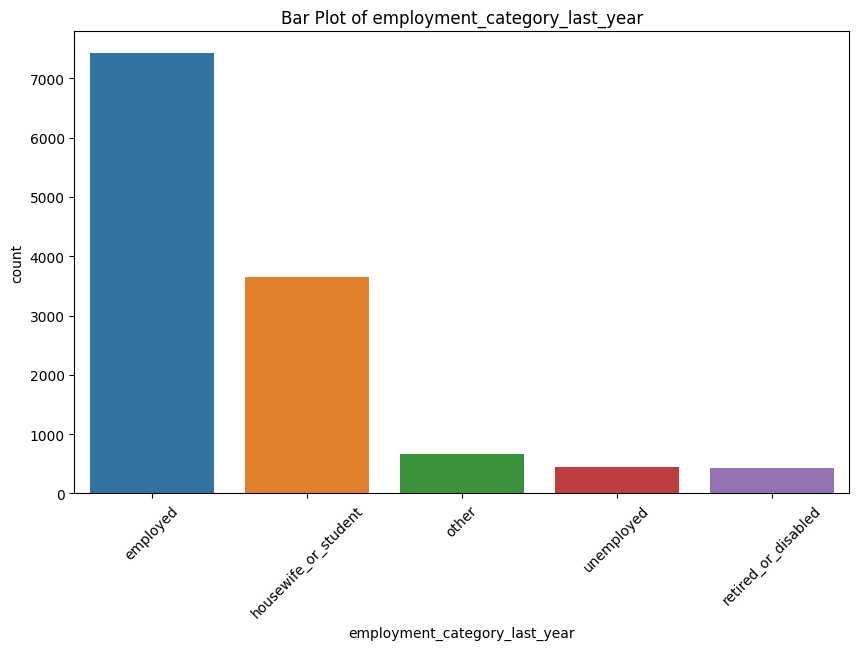

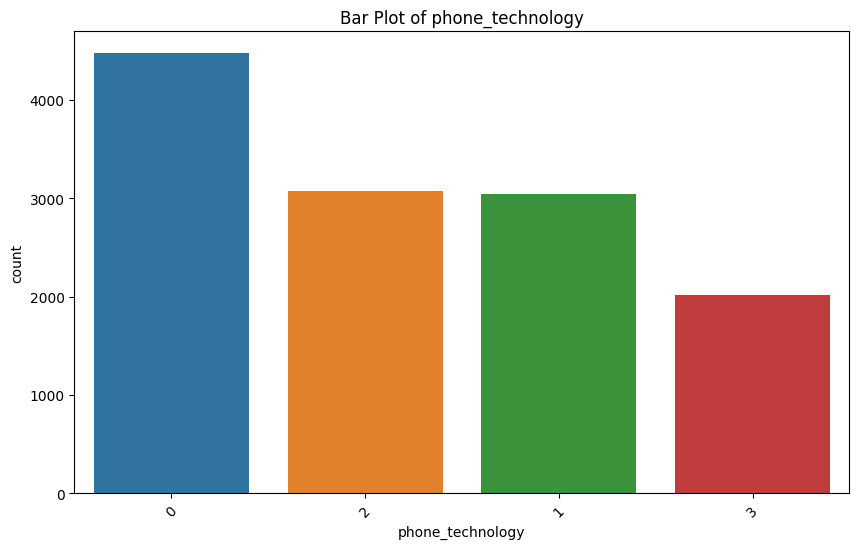

In [10]:
# Categorical feature bar plots
categorical_features = ['country', 'is_urban', 'married', 'religion', 'relationship_to_hh_head',
                        'education_level', 'literacy', 'employment_category_last_year', 'phone_technology']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=poverty_data, x=feature, order=poverty_data[feature].value_counts().index)
    plt.title(f"Bar Plot of {feature}")
    plt.xticks(rotation=45)
    plt.show()

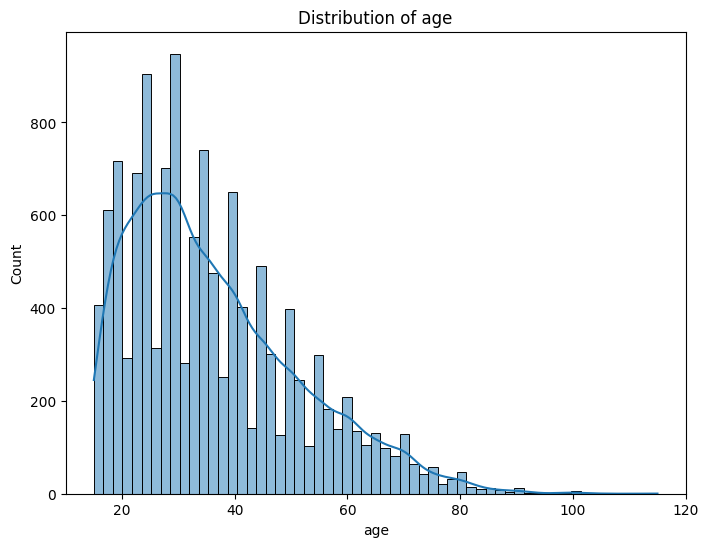

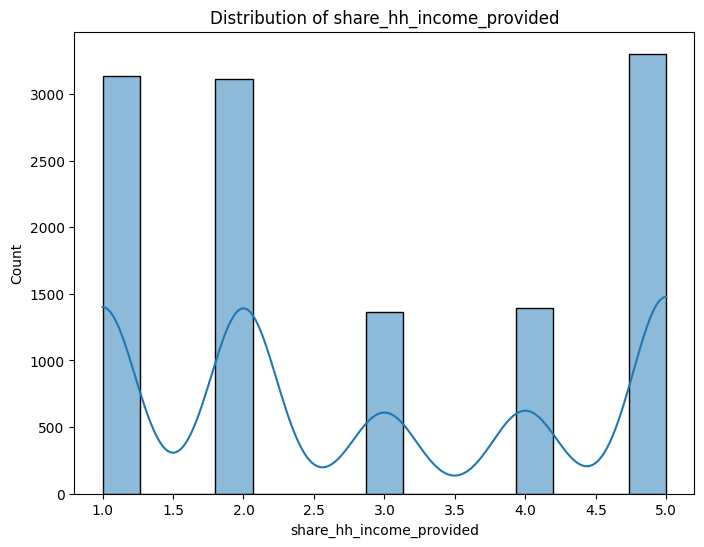

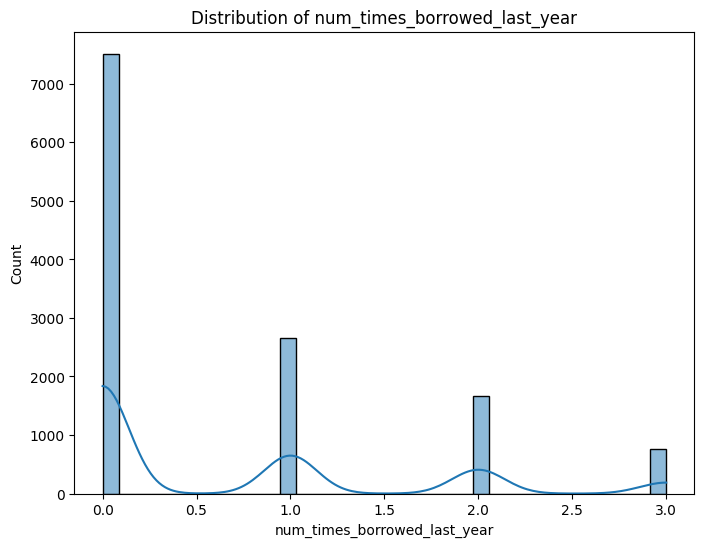

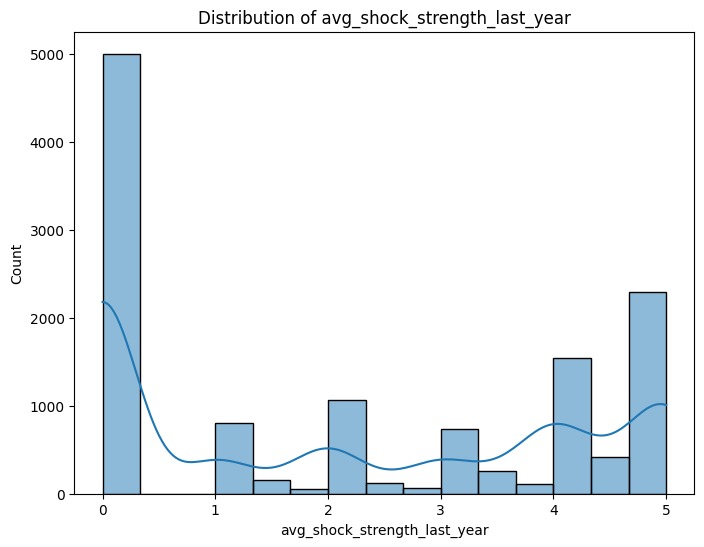

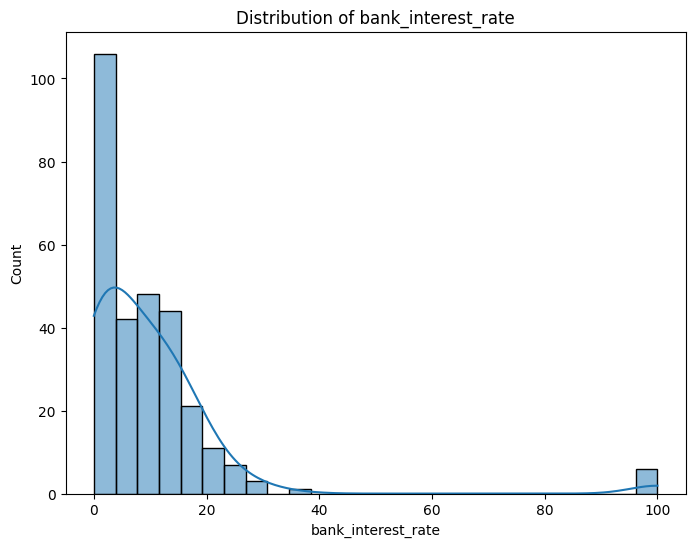

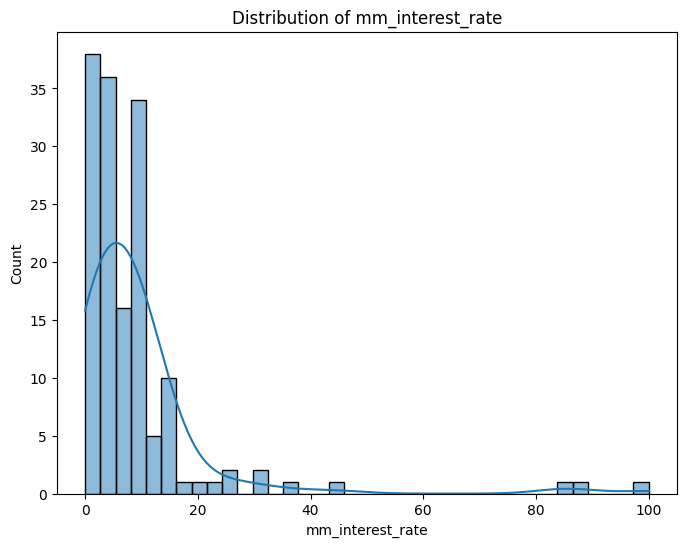

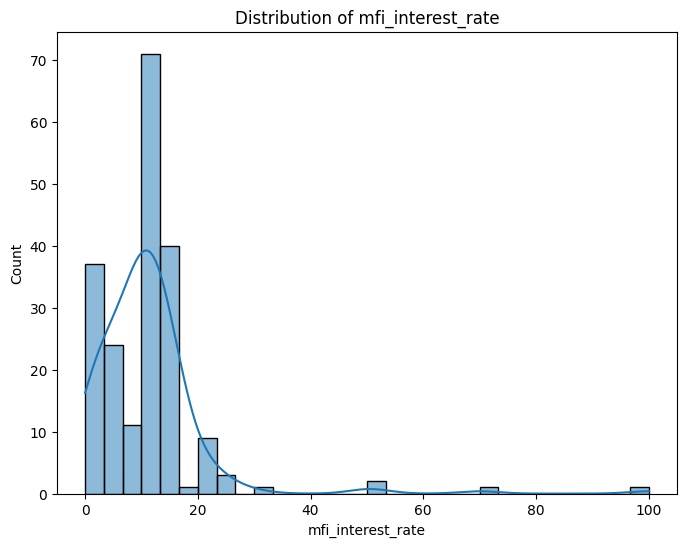

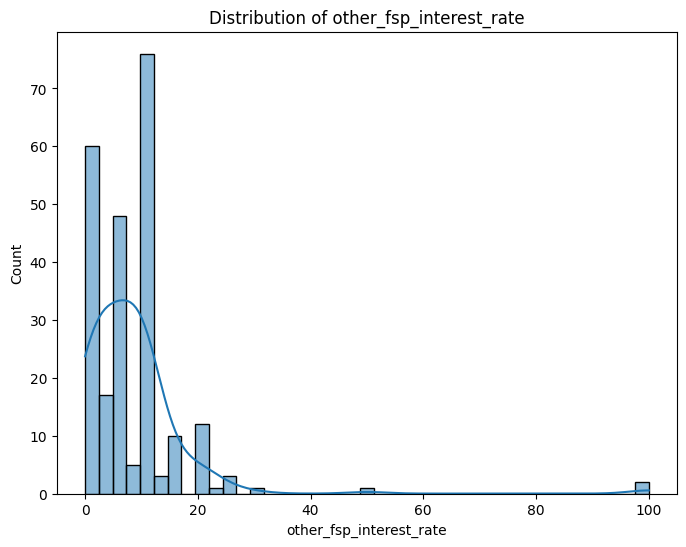

In [11]:
# Numeric feature distributions
numeric_features = ['age', 'share_hh_income_provided', 'num_times_borrowed_last_year', 'avg_shock_strength_last_year',
                    'bank_interest_rate', 'mm_interest_rate', 'mfi_interest_rate', 'other_fsp_interest_rate']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=poverty_data, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

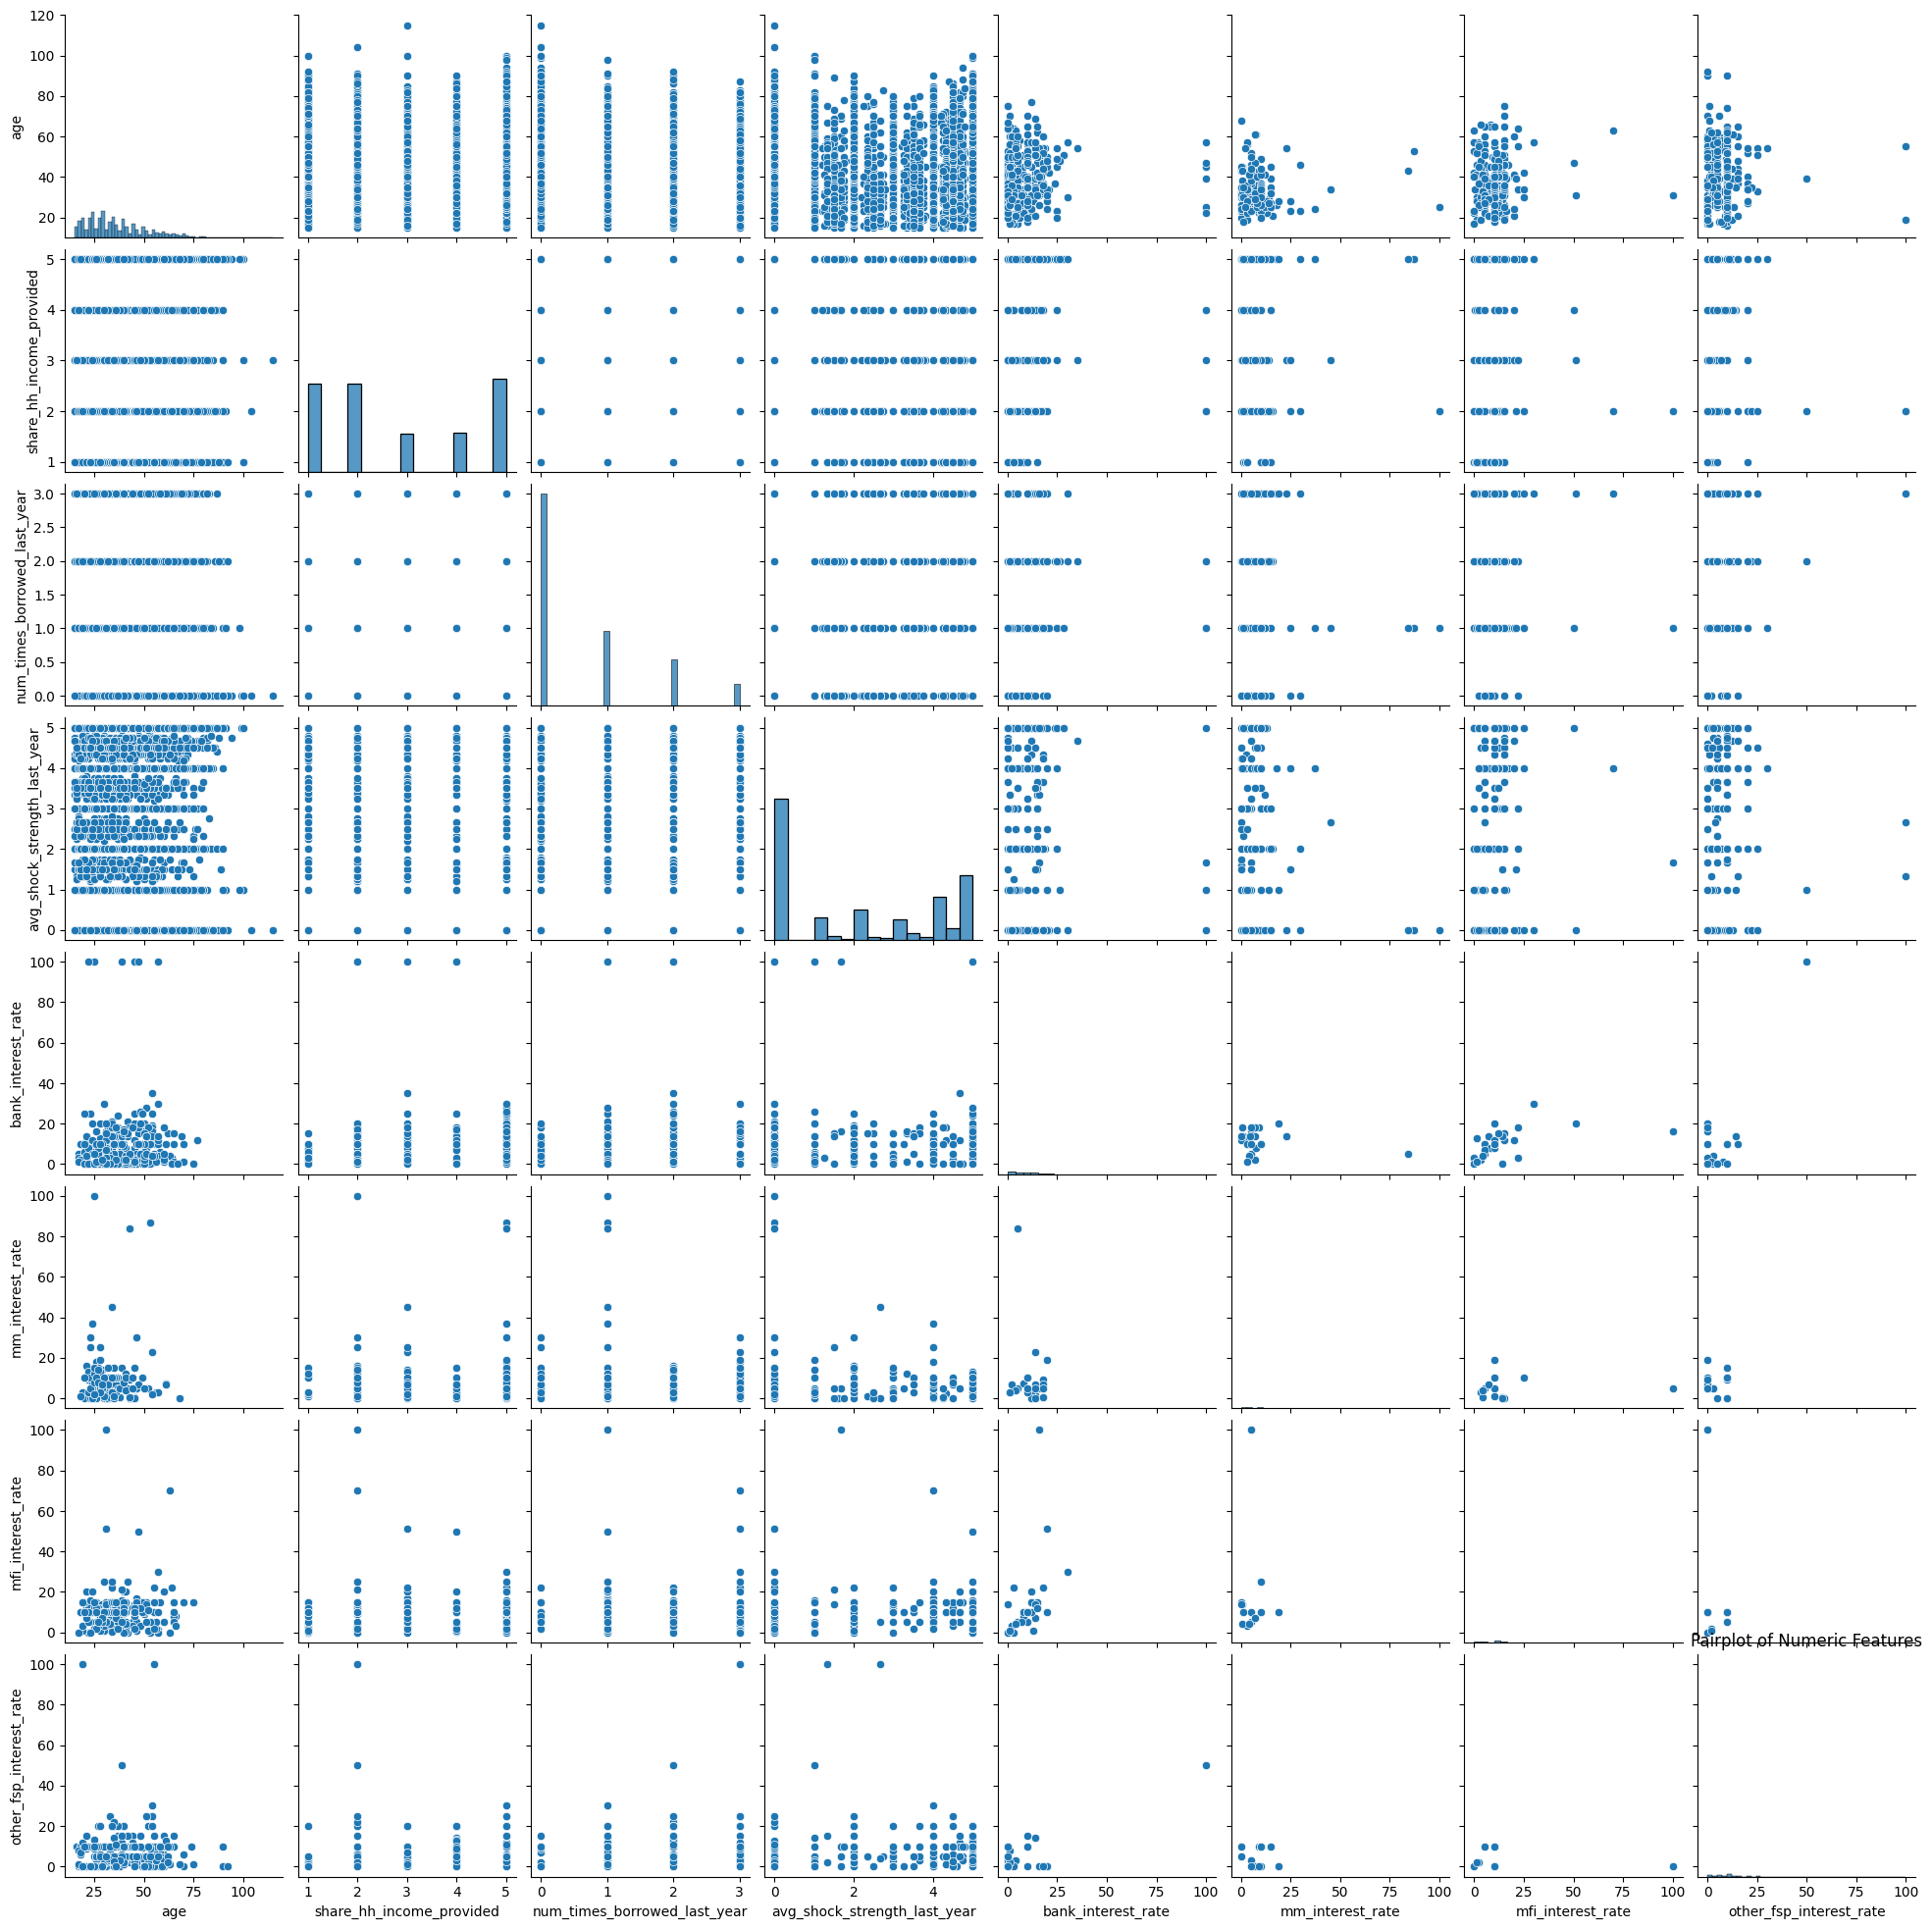

In [14]:
# Pairplot to visualize relationships between multiple numeric features
sns.pairplot(poverty_data[numeric_features])
plt.title("Pairplot of Numeric Features")
plt.show()

In [21]:
# Interactive bar plot for poverty_probability by education_level using Plotly
fig = px.bar(poverty_data, x='education_level', y='poverty_probability', color='is_urban', barmode='group',
             labels={'education_level': 'Education Level', 'poverty_probability': 'Poverty Probability'})
fig.update_layout(title='Poverty Probability by Education Level', xaxis_title='Education Level',
                  yaxis_title='Poverty Probability')
fig.show()

In [22]:
# Interactive scatter plot for age vs. poverty_probability using Plotly
fig = px.scatter(poverty_data, x='age', y='poverty_probability', color='is_urban', hover_data=['country'],
                 labels={'age': 'Age', 'poverty_probability': 'Poverty Probability'})
fig.update_layout(title='Age vs. Poverty Probability', xaxis_title='Age', yaxis_title='Poverty Probability')
fig.show()

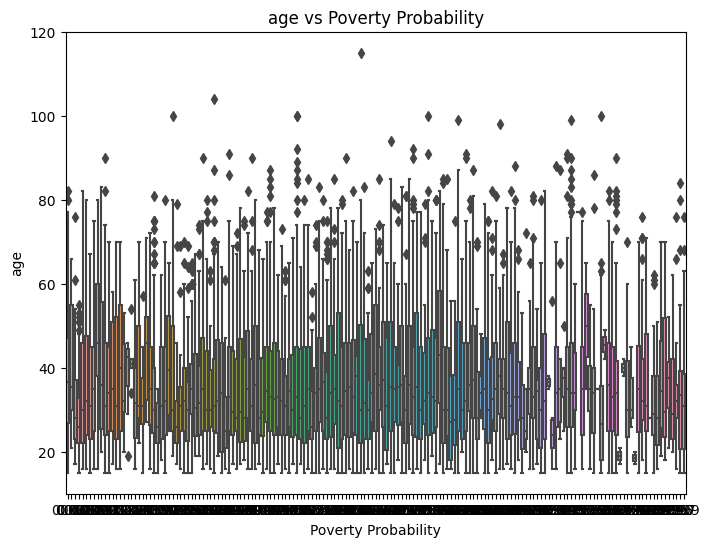

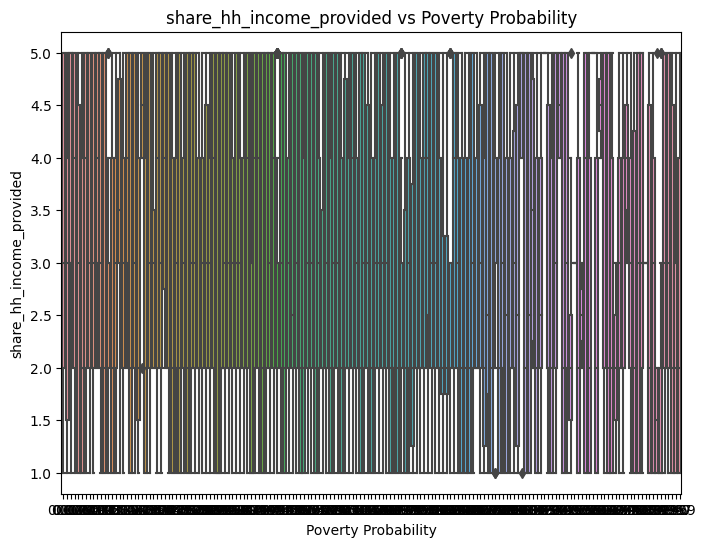

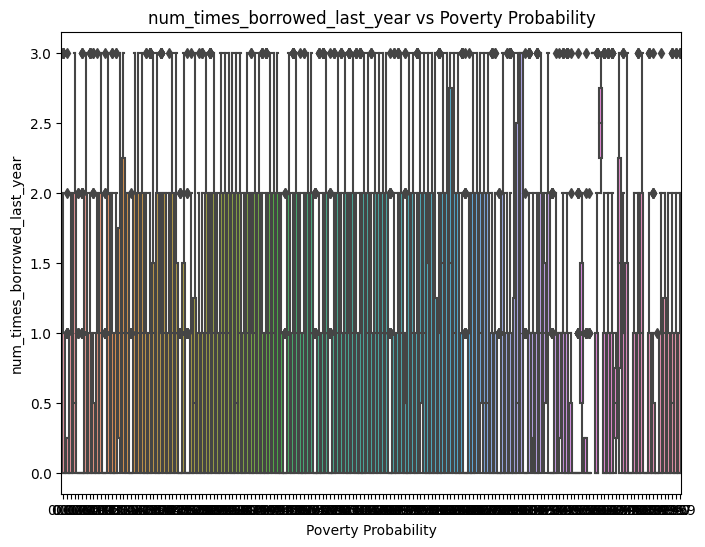

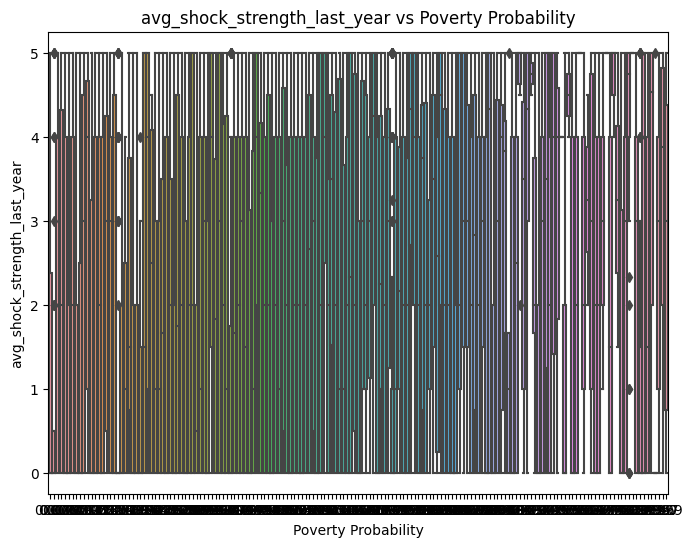

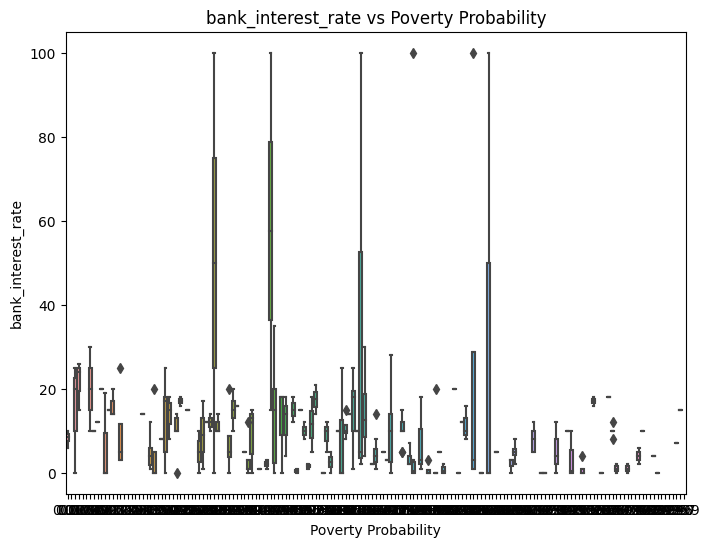

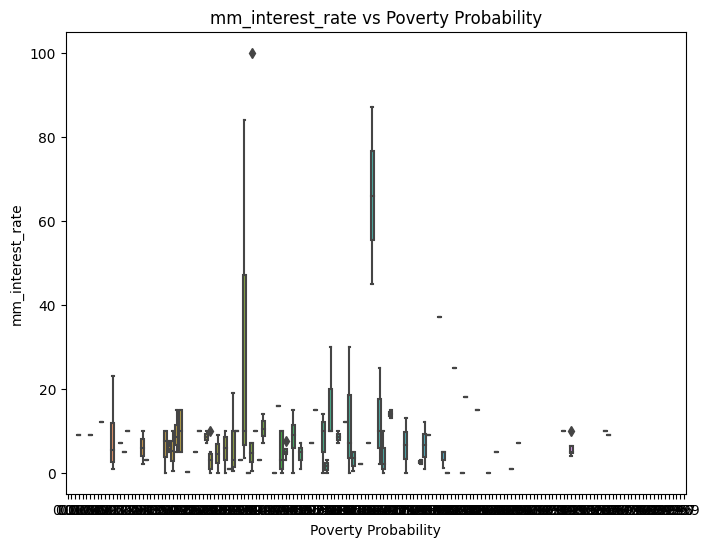

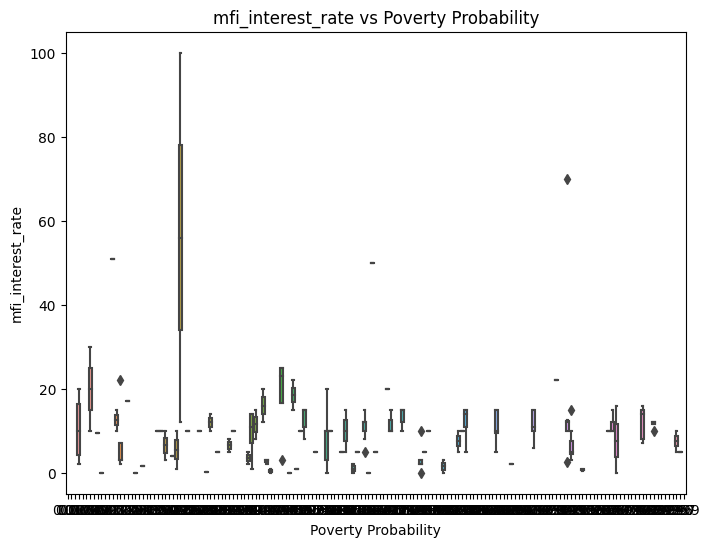

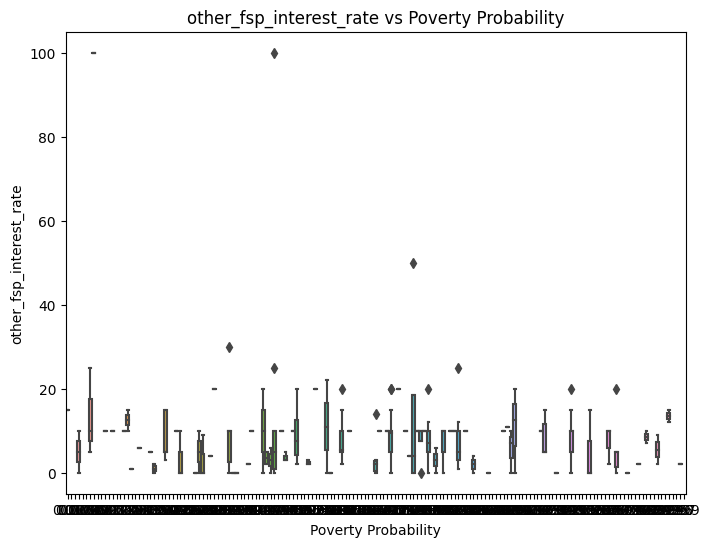

In [24]:
# Box plot for numeric features with respect to poverty_probability
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=poverty_data, x='poverty_probability', y=feature)
    plt.title(f"{feature} vs Poverty Probability")
    plt.xlabel("Poverty Probability")
    plt.ylabel(feature)
    plt.show()